<a href="https://colab.research.google.com/github/Vidikkk/NM_dz/blob/main/%D0%9B%D0%A013_%D0%9B%D0%B0%D0%BD%D0%BE%D0%B2%D0%B5%D0%BD%D0%BA%D0%BE_%D0%9E%D0%BB%D0%B5%D0%B3_%D0%92%D0%B0%D1%80%D1%96%D0%B0%D0%BD%D1%82_16_%D1%80%D1%96%D0%B2%D0%BD%D1%8F%D0%BD%D1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторна робота 13
Звичайні диференційні рівняння. Задачі Коші
Лановенко Олег ФІТ 2-10
Варіант 16

#Метод Ейлера

x = [1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4] 
y = [2.2    2.4107 2.6366 2.8774 3.133  3.403  3.6868 3.9835 4.2924 4.6124
 4.9421]


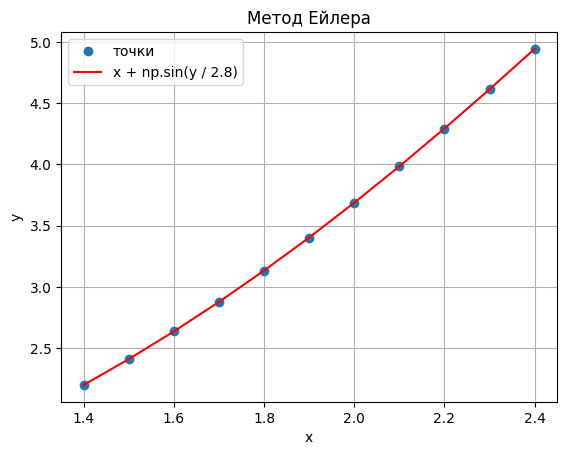

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return x + np.sin(y / 2.8)

# Вводимо параметри (ліва, права межі відрізку, крок, початкова умова)
a, b, h, y0 = 1.4, 2.4, 0.1, 2.2

# Перевірка вхідних параметрів
if h <= 0:
    print("Крок h повинен бути позитивним.")
    exit()
if a >= b:
    print("Права межа b повинна бути більшою за ліву межу a.")
    exit()

n = int((b - a) / h) # кількість кроків

x = np.array([a + i*h for i in range(n + 1)]) # задаємо x генератором списків

y = np.empty(n + 1)
y[0] = y0

for i in range(n):
    y[i + 1] = y[i] + f(x[i], y[i]) * h

y_rounded = np.round(y, 4)
print("x =", x, "\ny =", y_rounded)

plt.plot(x, y, "o", x, y, "red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Метод Ейлера")
plt.legend(["точки", "x + np.sin(y / 2.8)"])
plt.grid()
plt.show()

#перевірка odeint для першого завдання

x = [1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4] 
y = [2.2    2.4184 2.652  2.9006 3.1639 3.4413 3.7321 4.0353 4.35   4.6749
 5.0086]


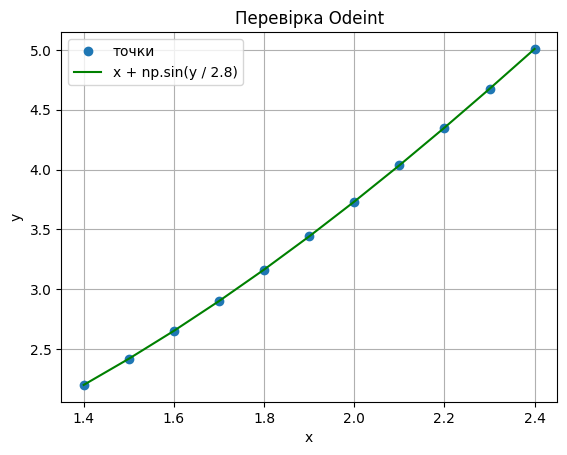

In [33]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def example (y,x):
  return x + np.sin(y / 2.8)

# Вводимо параметри (ліва, права межі відрізку, крок, початкова умова)
a, b, h, y0 = 1.4, 2.4, 0.1, 2.2

n = int((b - a) / h) # кількість кроків

x = np.array([a + i*h for i in range(n + 1)]) # задаємо x генератором списків

y = odeint(example, y0, x).flatten()

y_rounded = np.round(y, 4)
print("x =", x, "\ny =", y_rounded)

plt.plot(x, y, "o", x, y, "green")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Перевірка Оdeint")
plt.legend(["точки", "x + np.sin(y / 2.8)"])
plt.grid()
plt.show()


#перевірка solve_ivp для перешого завдання

x = [1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4]
y = [2.2    2.4184 2.652  2.9007 3.1639 3.4413 3.7321 4.0353 4.35   4.6749
 5.0086]


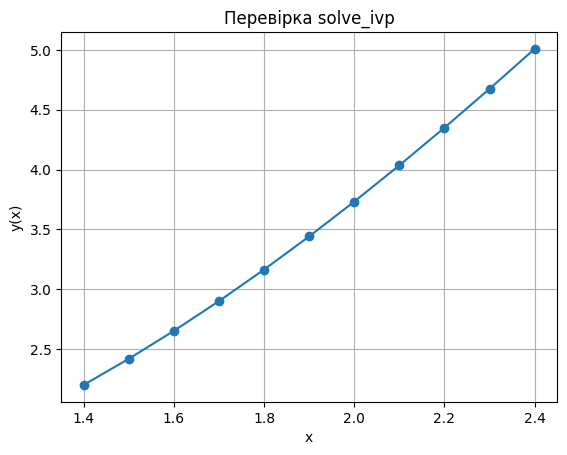

In [46]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def example (x,y):
  return x + np.sin(y / 2.8)

# Вводимо параметри (ліва, права межі відрізку, крок, початкова умова)
a, b, h,  = 1.4, 2.4, 0.1
y0 = [2.2]
n = int((b - a) / h) # кількість кроків

x = np.linspace(a,b,n+ 1)

sol  = solve_ivp(example, [a, b], y0, t_eval=x)

# Виведення результатів
y_rounded = np.round(sol.y[0], 4)
x_rounded = np.round(sol.t, 1)
print('x =', x_rounded)
print('y =', y_rounded)
# Побудова графіка результатів
plt.plot(sol.t, sol.y[0], marker='o')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Перевірка solve_ivp')
plt.grid()
plt.show()

#Метод Ейлера-Коші

x = [0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6] 
y = [0.8    0.9611 1.1307 1.3084 1.4937 1.6863 1.8858 2.0916 2.3034 2.5207
 2.743 ]


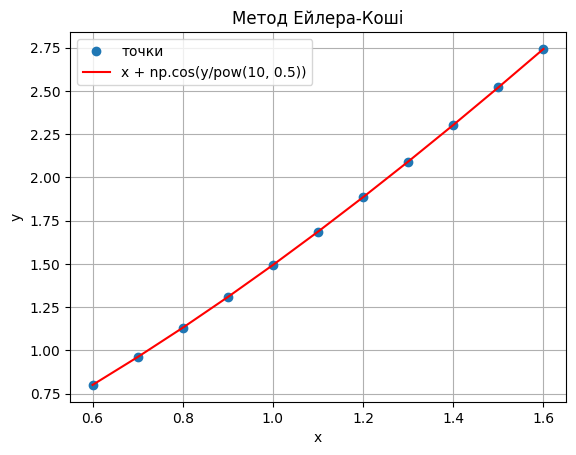

In [51]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return x + np.cos(y/pow(10, 0.5))

a = 0.6  # ліва межа відрізку
b = 1.6  # права межа відрізку
h = 0.1  # крок
y0 = 0.8  # початкова умова
n = int((b - a) / h)  # кількість кроків

# Генерація x, враховуючи останнє значення
x = np.arange(a, b + h, h)  # Задати x з включенням b

y = np.empty(n + 1)
y[0] = y0

# Метод Ейлера-Коші
for i in range(n):
    # Використовується середнє значення для нахилу
    y[i + 1] = y[i] + (f(x[i], y[i]) + f(x[i + 1], y[i] + h * f(x[i], y[i]))) * h / 2

y_rounded = np.round(y, 4)

print("x =", x, "\ny =", y_rounded)

# Візуалізація
plt.plot(x, y, "o", x, y, "red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Метод Ейлера-Коші")
plt.legend(["точки", "x + np.cos(y/pow(10, 0.5))"])
plt.grid()
plt.show()


#Розв’язок диф. Рівняння за допомогою scipy.integrate import odeint

x= [0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6]
y= [0.8    0.9611 1.1307 1.3084 1.4937 1.6863 1.8858 2.0917 2.3035 2.5208
 2.7431]


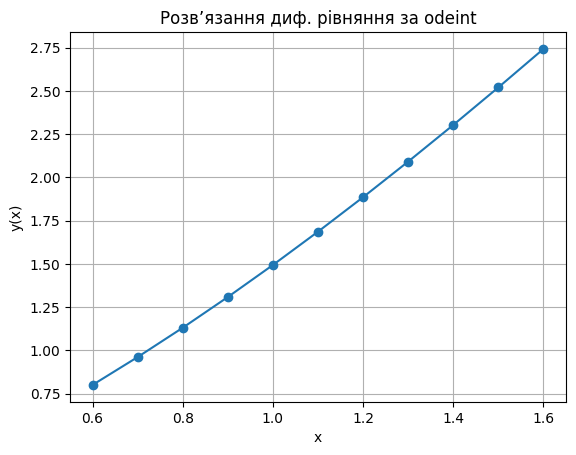

In [63]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Функція, що повертає dy/dx
def f(y, x):
    return x + np.cos(y/pow(10, 0.5))

# Початкова умова
y0 = 0.8
a, b, h = 0.6, 1.6, 0.1
n = int((b - a) / h) # кількість кроків

# Значення x
x = np.array([a + i*h for i in range(n + 1)]) # задаємо x генератором списків

# Розв'язання ODE
y = odeint(f, y0, x)
y_rounded = np.round(y, 4)

# Виведення результатів
print('x=', x)
print('y=', y_rounded.flatten())  # Перетворення в одновимірний масив для виводу

# Побудова графіка результатів
plt.plot(x, y, marker='o')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Розв’язання диф. рівняння за odeint')
plt.grid()
plt.show()


#Використання scipy.integrate.solve_ivp
Функція solve_ivp є більш сучасним і гнучким способом розв'язання ODE, ніж odeint. Вона також дозволяє використовувати різні методи інтегрування.

x = [0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6]
y = [0.8    0.9611 1.1307 1.3084 1.4937 1.6863 1.8858 2.0916 2.3034 2.5207
 2.7431]


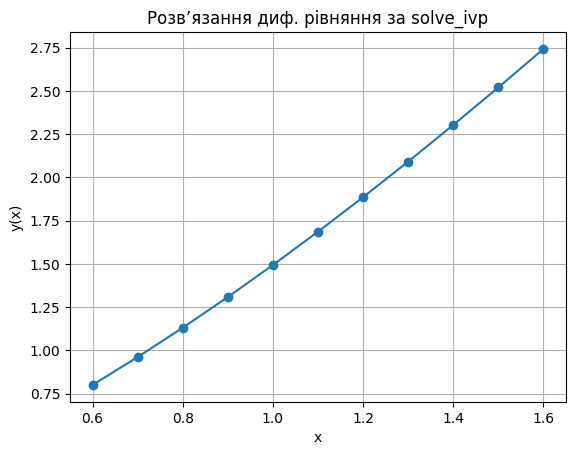

In [64]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Функція, що повертає dy/dx
def f(x, y):
    return x + np.cos(y/pow(10, 0.5))


# Вводимо параметри (ліва, права межі відрізку, крок, початкова умова)
a, b, h,  = 0.6, 1.6, 0.1
y0 = [0.8]  # Потрібно передати як список

n = int((b - a) / h) # кількість кроків

# Значення x
x = np.linspace(a, b, n+1)

# Розв'язання ODE
sol = solve_ivp(f, [a, b], y0, t_eval=x)

# Виведення результатів
y_rounded = np.round(sol.y[0], 4)
x_rounded = np.round(sol.t, 1)
print('x =', x_rounded)
print('y =', y_rounded)

# Побудова графіка результатів
plt.plot(sol.t, sol.y[0], marker='o')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Розв’язання диф. рівняння за solve_ivp')
plt.grid()
plt.show()
